In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 기초 통계 개념정리

## 1) 대푯값: 데이터의 중심을 나타내는 값
* 평균(mean)
* 중앙값(median)
* 최빈값(mode)

### (1) 평균(mean) $ \mu $
* 모든 값의 총합을 값의 개수로 나눈 값
* 극단적인 값(이상값/아웃라이어)이 있는 경우 평균에 영향을 미친다.
* 모집단의 평균 $ \mu $
* 표본집단의 평균 $ \bar{x} $
* $$ 모평균: \mu = {\sum_{i=1}^N x_i \over N} $$
* $$ 표본평균: \bar{x} = {\sum_{i=1}^N x_i \over n} $$

In [2]:
a = pd.DataFrame([2,3,3,4,4,5,7,7,7,8], columns=['표본'])
a

,표본
0,2
1,3
2,3
3,4
4,4
5,5
6,7
7,7
8,7
9,8


In [3]:
# 평균
a.mean()

표본    5.0
dtype: float64

### (2) 중앙값(median)
* 모든 데이터를 큰 순서대로 나열할 때 가운데 있는 값
* 데이터의 개수가 홀수일 때는 정중앙의 값
* 데이터의 개수가 짝수일 때는 정중앙 2개의 수의 평균값
* 이상치가 있어도 영향을 받지 않는다.

In [4]:
a.T

,0,1,2,3,4,5,6,7,8,9
표본,2,3,3,4,4,5,7,7,7,8


In [5]:
# 중앙값
a.median()

표본    4.5
dtype: float64

In [6]:
b = a.drop(9)
b

,표본
0,2
1,3
2,3
3,4
4,4
5,5
6,7
7,7
8,7


In [7]:
b.T

,0,1,2,3,4,5,6,7,8
표본,2,3,3,4,4,5,7,7,7


In [10]:
b.median()

표본    4.0
dtype: float64

### (3) 최빈값(mode)
* 표본에서 가장 많이 등장하는 값
* 최빈값도 극단값에 영향을 받지 않음

In [13]:
a.T

,0,1,2,3,4,5,6,7,8,9
표본,2,3,3,4,4,5,7,7,7,8


In [14]:
# 최빈값
a.mode()

,표본
0,7


### (4) 산술평균/기하평균
* 산술평군(덧셈의 평균): 모든 데이터의 합계 / 데이터 수
* 기하평균(곱셈의 평균): 모든 데이터의 곱의 n제곱근 - 증가율의 평균을 계산할 때 사용

In [15]:
a.T

,0,1,2,3,4,5,6,7,8,9
표본,2,3,3,4,4,5,7,7,7,8


In [16]:
# 산술평균
# (2+3+3+4+4+5+7+7+7+8) / 10
print(a.mean())
print((2+3+3+4+4+5+7+7+7+8) / 10)

표본    5.0
dtype: float64
5.0


In [17]:
# 기하평균
math.pow((2*3*3*4*4*5*7*7*7*8), 1/10)

4.567459024554638

In [18]:
from scipy.stats import gmean
geometric_mean = gmean(a['표본'])
print("기하평균: ", geometric_mean)

기하평균:  4.567459024554637


2020년에 7%, 2021년에 35%, 2022년에 40%, 2023년에 69%의 매출 증가가 있었다면 4년간 평균 매출 증가율은?

In [19]:
print('산술평균: ', pd.Series([7, 35, 40, 69]).mean())
print('기하평균: ', gmean([7, 35, 40, 69]))

산술평균:  37.75
기하평균:  28.67601451933219


## 2) 도수 분포표와 히스토그램
### (1) 도수분포표(histogram 그래프) 
* 주어진 데이터를 일정한 범위로 나누고 그 범위에 출현하는 데이터 개수를 조사해 나타낸 표
* 데이터의 구간 폭을 '계급(class)', 각 계급에 속하는 데이터 개수 '도수'라고 한다.
* 각 계급의 중앙값을 '계급값'이라 한다.
* 도수분포표에서 도수가 큰 것을 '출현 횟수가 많다'고 하고
* 가장 도수가 큰 계급의 계급값을 '최빈값'이라고 한다.

In [21]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [22]:
age = data[['Age']]
age

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [23]:
# value_counts로 도수분포표 만들기
age.value_counts()

Age 
24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
        ..
53.0     1
66.0     1
70.5     1
74.0     1
80.0     1
Name: count, Length: 88, dtype: int64

In [25]:
# 계급 구간을 10단위로 계급을 나누어 도수분포표를 만들고 
# 도수분포표(Frequency Distribution Table)를 시각화한 히스토그램 그래프 그리기
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90)
labels = ('under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s')
age_FDT = pd.cut(age['Age'].values, bins=bins, labels=labels, right=False)
print(age_FDT.value_counts())

under10s     62
10s         102
20s         220
30s         167
40s          89
50s          48
60s          19
70s           6
80s           1
Name: count, dtype: int64


<Axes: >

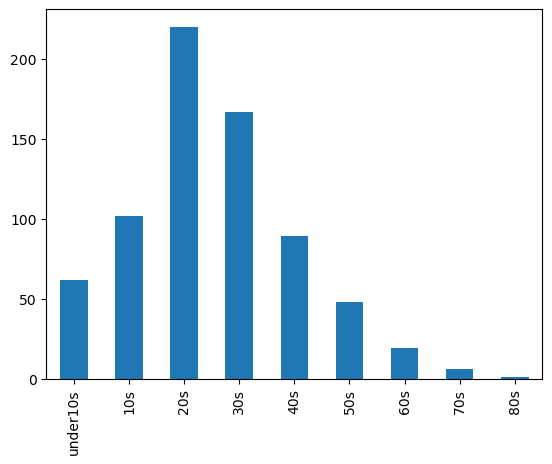

In [28]:
age_FDT.value_counts().plot(kind='bar')

### (2) 상대도수분포표(Relative Frequency Distribution Table)
* 상대도수: 계급의 도수 / 전체 도수의 합계, 어떤 계급의 도수가 전체 도수에서 몇 % 를 차지하는지 나타내는 값
* 상대도수분포표: 모든 계급의 상대도수를 구해서 더한 것

In [31]:
fdt_df = pd.DataFrame(age_FDT.value_counts())
fdt_df

,count
under10s,62
10s,102
20s,220
30s,167
40s,89
50s,48
60s,19
70s,6
80s,1


In [ ]:
# 상대도수분포표 만들기
# 상대도수: 계급의 도수 / 전체 도수의 합계

In [32]:
fdt_df['count'] / fdt_df['count'].sum()

under10s    0.086835
10s         0.142857
20s         0.308123
30s         0.233894
40s         0.124650
50s         0.067227
60s         0.026611
70s         0.008403
80s         0.001401
Name: count, dtype: float64

In [34]:
round(fdt_df['count'] / fdt_df['count'].sum(), 3) * 100

under10s     8.7
10s         14.3
20s         30.8
30s         23.4
40s         12.5
50s          6.7
60s          2.7
70s          0.8
80s          0.1
Name: count, dtype: float64

In [35]:
fdt_df['rfdt'] = round(fdt_df['count'] / fdt_df['count'].sum(), 3) * 100

In [36]:
fdt_df

,count,rfdt
under10s,62,8.7
10s,102,14.3
20s,220,30.8
30s,167,23.4
40s,89,12.5
50s,48,6.7
60s,19,2.7
70s,6,0.8
80s,1,0.1


### 구간화가 필요한 데이터에서 계급의 개수는 몇 개로?
* 스터지스 공식: 도수분포표나 히스토그램을 만들 때 계급의 수가 적당한지 판단하는 공식
* 전체 데이터 개수를 $ 2^n $ 이라 하고, 그때 계급 수를 n+1 한다.

In [37]:
len(age['Age'])

891

In [40]:
# 891은 2의 몇 승?
n = math.log(891, 2)
print(round(n)+1)

11


### 3) 편차(deviation)
* 데이터와 평균이 떨어진 거리, 데이터와 평균 값 과의 차이
* 데이터 - 평균값

In [44]:
a['평균'] = a['표본'].mean()
a

,표본,평균
0,2,5.0
1,3,5.0
2,3,5.0
3,4,5.0
4,4,5.0
5,5,5.0
6,7,5.0
7,7,5.0
8,7,5.0
9,8,5.0


In [45]:
a['편차'] = a['표본'] - a['평균']
a

,표본,평균,편차
0,2,5.0,-3.0
1,3,5.0,-2.0
2,3,5.0,-2.0
3,4,5.0,-1.0
4,4,5.0,-1.0
5,5,5.0,0.0
6,7,5.0,2.0
7,7,5.0,2.0
8,7,5.0,2.0
9,8,5.0,3.0


In [47]:
# 전체 데이터의 편차의 합 0
a['편차'].sum()

np.float64(0.0)

## 4) 분산(variance): 편차 제곱의 합 / 데이터 수
* 평균으로부터 떨어진 정도가 잘 보일 수 있도록 고안된 지표
* 편차의 합은 양수와 음수가 합쳐져서 0이 되기 때문에 각 데이터가 평균으로부터 얼마나 떨어져 있는지 알 수 없어서 편차 제곱의 합인 분산을 사용함
* 모분산: $ \sigma^2 $
$$ \sigma^2 = {\sum(x_i-\mu)^2 \over N} $$
* 표본분산: $ s^2 $
$$ s^2 = {\sum(x_i-\bar{x})^2 \over n-1} $$

In [48]:
# 분산: 편차제곱의 합 / 데이터 수
a['편차제곱'] = a['편차'] ** 2
a

,표본,평균,편차,편차제곱
0,2,5.0,-3.0,9.0
1,3,5.0,-2.0,4.0
2,3,5.0,-2.0,4.0
3,4,5.0,-1.0,1.0
4,4,5.0,-1.0,1.0
5,5,5.0,0.0,0.0
6,7,5.0,2.0,4.0
7,7,5.0,2.0,4.0
8,7,5.0,2.0,4.0
9,8,5.0,3.0,9.0


In [49]:
a['모분산'] = a['편차제곱'].sum() / len(a['편차제곱'])
a

,표본,평균,편차,편차제곱,모분산
0,2,5.0,-3.0,9.0,4.0
1,3,5.0,-2.0,4.0,4.0
2,3,5.0,-2.0,4.0,4.0
3,4,5.0,-1.0,1.0,4.0
4,4,5.0,-1.0,1.0,4.0
5,5,5.0,0.0,0.0,4.0
6,7,5.0,2.0,4.0,4.0
7,7,5.0,2.0,4.0,4.0
8,7,5.0,2.0,4.0,4.0
9,8,5.0,3.0,9.0,4.0


In [50]:
a['표본'].var()

np.float64(4.444444444444445)